In [1]:
import os
import sys
sys.path.append(os.path.abspath('..')) # add parent path to working directory

In [2]:

from importlib import reload
from scripts import data_load_clean_transform, fraud_detection_preprocessor, model_explainablity, fraud_detection
reload(data_load_clean_transform) # reload the script to avoid kernel restart
reload(fraud_detection_preprocessor)
reload(model_explainablity)
reload(fraud_detection)
reload(model_explainablity)

<module 'scripts.model_explainablity' from 'c:\\ML and DS Files\\Kifiya AI\\Kaim-week-8-9\\scripts\\model_explainablity.py'>

In [6]:
from scripts.model_explainablity import ModelExplainability
from scripts.fraud_detection import FraudDetectionML

In [5]:
fraud_data_path = '../week 8-9 data/Data/fraud_detection_preprocessed.pkl'
creditcard_data_path = '../week 8-9 data/Data/creditcard.csv'
fraud_ml = FraudDetectionML(fraud_data_path, creditcard_data_path)

In [ ]:
fraud_ml.train_and_evaluate('fraud')

Training LogisticRegression on fraud dataset...
LogisticRegression Accuracy: 0.9500
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     27103
         1.0       0.91      0.53      0.67      2866

    accuracy                           0.95     29969
   macro avg       0.93      0.76      0.82     29969
weighted avg       0.95      0.95      0.94     29969

Training DecisionTree on fraud dataset...
DecisionTree Accuracy: 0.9139
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.95      0.95     27103
         1.0       0.55      0.60      0.57      2866

    accuracy                           0.91     29969
   macro avg       0.75      0.77      0.76     29969
weighted avg       0.92      0.91      0.92     29969

Training RandomForest on fraud dataset...
RandomForest Accuracy: 0.9560
Classification Report:
               precision    recall  f1-score   

 99%|===================| 988/1000 [01:31<00:01]        

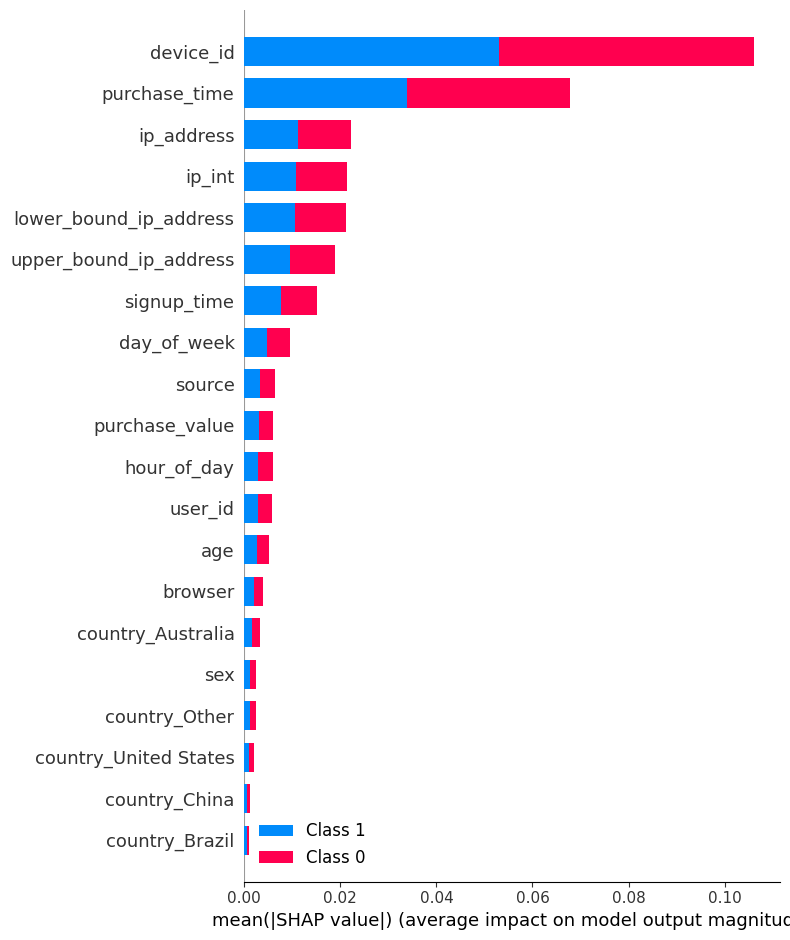

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

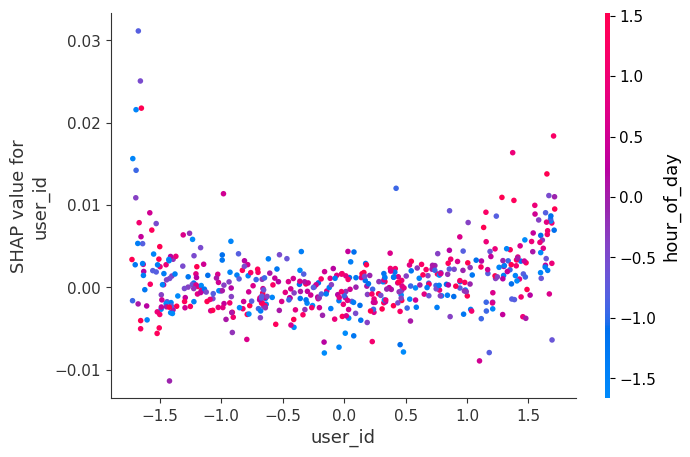

<Figure size 640x480 with 0 Axes>

In [ ]:
explainability = ModelExplainability(fraud_ml)
explainability.shap_explain('fraud')

100%|===================| 996/1000 [01:04<00:00]        

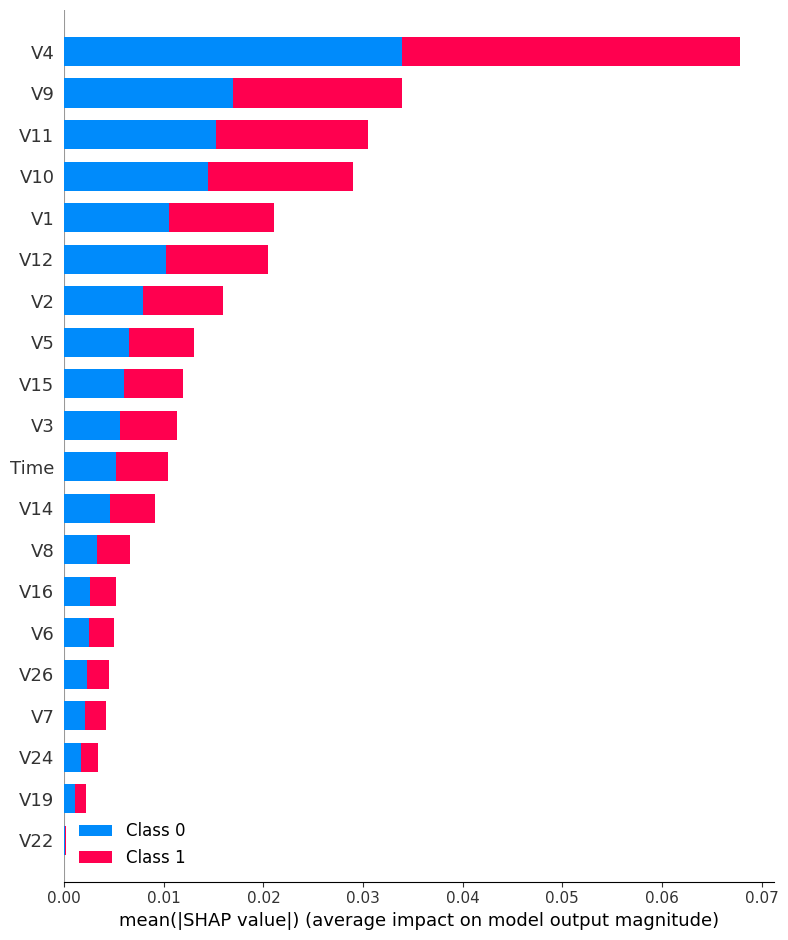

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

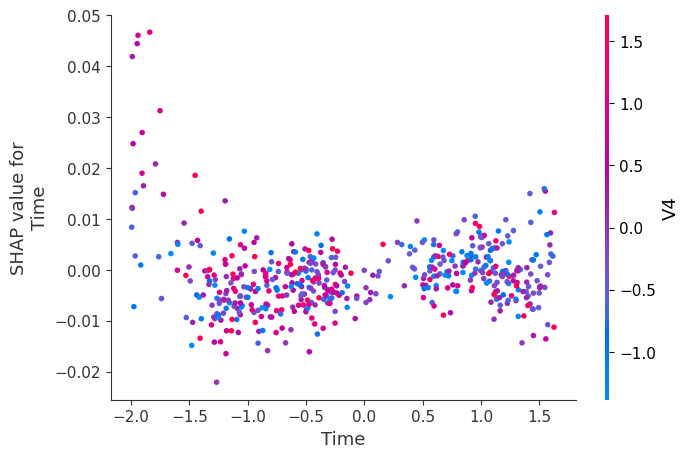

<Figure size 640x480 with 0 Axes>

In [ ]:
explainability.shap_explain('creditcard')

In [9]:
###  from encoded dataframe show the encoding in JSON for prediction

In [7]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler

def transform_data(pkl_path, scaler_path):
    """Read a preprocessed dataframe from pickle and return the transformed feature dataframe head."""
    # Load dataset
    df = pd.read_pickle(pkl_path)
    X = df.drop(columns=['class']) if 'class' in df.columns else df.drop(columns=['Class'])
    
    # Convert timestamp columns to UNIX timestamp
    if 'signup_time' in X.columns and 'purchase_time' in X.columns:
        X['signup_time'] = pd.to_datetime(X['signup_time']).astype('int64') // 10**9
        X['purchase_time'] = pd.to_datetime(X['purchase_time']).astype('int64') // 10**9
    
    # Identify categorical columns
    categorical_columns = X.select_dtypes(include=['object']).columns
    
    # Apply frequency encoding
    for col in categorical_columns:
        freq_encoding = X[col].value_counts().to_dict()
        X[col] = X[col].map(freq_encoding)
    
    # Load the trained scaler
    scaler = joblib.load(scaler_path)
    
    # Apply Scaling (only on numerical features)
    numeric_columns = X.select_dtypes(include=['number']).columns
    X[numeric_columns] = scaler.transform(X[numeric_columns])
    
    # Show all columns without truncation
    pd.set_option('display.max_columns', None)
    return X.iloc[[0]]  # Show first row with all columns


# Example usage
pkl_path = "../week 8-9 data/Data/fraud_detection_preprocessed.pkl"  # Change path as needed
scaler_path = "../fraud_detection_api/models/fraud_scaler.pkl"  # Change path as needed
transformed_head = transform_data(pkl_path, scaler_path)
transformed_head


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,ip_int,lower_bound_ip_address,upper_bound_ip_address,transaction_count,hour_of_day,day_of_week,country_Australia,country_Brazil,country_Canada,country_China,country_France,country_Germany,country_Japan,country_Korea Republic of,country_Other,country_United Kingdom,country_United States
634,0.411353,1.006349,0.663973,0.550334,-0.260422,0.538292,-1.012117,-1.185186,-0.366365,-1.72233,-1.72233,-1.760515,-1.768079,0.0,-1.231657,1.488934,-0.404723,-0.142477,-0.141682,-0.292773,-0.147603,-0.158175,-0.236446,6.099269,-0.485893,-0.175226,-0.808164


In [8]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler

def transform_data(pkl_path, scaler_path):
    """Read a preprocessed dataframe from pickle and return the transformed feature dataframe as JSON."""
    # Load dataset
    df = pd.read_pickle(pkl_path)
    X = df.drop(columns=['class']) if 'class' in df.columns else df.drop(columns=['Class'])
    
    # Convert timestamp columns to UNIX timestamp
    if 'signup_time' in X.columns and 'purchase_time' in X.columns:
        X['signup_time'] = pd.to_datetime(X['signup_time']).astype('int64') // 10**9
        X['purchase_time'] = pd.to_datetime(X['purchase_time']).astype('int64') // 10**9
    
    # Identify categorical columns
    categorical_columns = X.select_dtypes(include=['object']).columns
    
    # Apply frequency encoding
    for col in categorical_columns:
        freq_encoding = X[col].value_counts().to_dict()
        X[col] = X[col].map(freq_encoding)
    
    # Load the trained scaler
    scaler = joblib.load(scaler_path)
    
    # Apply Scaling (only on numerical features)
    numeric_columns = X.select_dtypes(include=['number']).columns
    X[numeric_columns] = scaler.transform(X[numeric_columns])
    
    # Convert first row to JSON format
    first_row_json = X.iloc[[0]].to_json(orient='records', indent=4)
    return first_row_json

# Example usage
pkl_path = "../week 8-9 data/Data/fraud_detection_preprocessed.pkl"  # Change path as needed
scaler_path = "../fraud_detection_api/models/fraud_scaler.pkl"  # Change path as needed
transformed_json = transform_data(pkl_path, scaler_path)
print(transformed_json)


[
    {
        "user_id":0.411353223,
        "signup_time":1.0063485961,
        "purchase_time":0.6639727642,
        "purchase_value":0.5503344848,
        "device_id":-0.2604222185,
        "source":0.538291716,
        "browser":-1.012117032,
        "sex":-1.185186021,
        "age":-0.3663654721,
        "ip_address":-1.7223301067,
        "ip_int":-1.7223301063,
        "lower_bound_ip_address":-1.7605149233,
        "upper_bound_ip_address":-1.7680786747,
        "transaction_count":0.0,
        "hour_of_day":-1.2316573921,
        "day_of_week":1.488933599,
        "country_Australia":-0.4047234294,
        "country_Brazil":-0.1424766646,
        "country_Canada":-0.1416822582,
        "country_China":-0.2927731154,
        "country_France":-0.1476033616,
        "country_Germany":-0.1581753866,
        "country_Japan":-0.236446427,
        "country_Korea Republic of":6.099269095,
        "country_Other":-0.4858933524,
        "country_United Kingdom":-0.1752256176,
        